In [1]:
# import required packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import utilities_visuals as ut
import pickle

In [2]:
# creates a heatmap for two variables under the condition value of a third variable.
def plot_heatmap_two_var(atts_over_time, x_var, y_var, cond_var, cond_val, measure):

    filtered_measures = []
    x_vals = []
    y_vals = []
    i = 1

    # sets the maximal possible values
    max_for_heat = np.sqrt(2)
    min_for_heat = 0

    # saves the measurements for each parameter combination in a extra list
    for ele in atts_over_time:
        if ele[cond_var] == cond_val:
            filtered_measures.append(np.round(np.mean(ele[measure]),2))
            x_vals.append(ele[x_var])
            y_vals.append(ele[y_var])
            i+=1

    # rearranges that list into a 2d array
    two_d_measure_matrix = np.array(filtered_measures).reshape((len(np.unique(y_vals)), len(np.unique(x_vals))))

    f = plt.figure()

    # plots that 2d array as a heatmap
    plt.xticks(ticks=np.arange(len(set(x_vals))), labels=np.unique(x_vals), rotation=90)
    plt.yticks(ticks=np.arange(len(set(y_vals))), labels=np.unique(y_vals))
    plt.imshow(two_d_measure_matrix, cmap='viridis',interpolation="none", origin='lower', vmax = max_for_heat, vmin = min_for_heat)
    plt.colorbar()
    plt.ylabel(y_var, rotation=0)
    plt.xlabel(x_var, rotation=0)
    plt.xticks(ticks=[0,6,12,18,24],rotation=0)
    plt.yticks(ticks=[0,6,12,18,24],rotation=0)
    plt.show()

    return f

In [3]:
# loads and saves previous results using the pickle-library
def load_save_from_pickle(name, f_to_save=None):
    if f_to_save == None:
        with open(name, 'rb') as f:
            result = pickle.load(f)
        return result
    else:
        with open(name, 'wb') as fout:
            pickle.dump(f_to_save, fout)
        return 0

In [4]:
# restores the result from the model simulation notebook
%store -r result

In [5]:
print("now calculating mean pairwise distance")
# adds the mean of pairwise distance to each model simulation
result = ut.calc_mean_pairwise_over_time(result)
print("now calculating bias")
# adds the bias to each model simulation
result = ut.calc_bias_distance_time(result)
print("now saving")
load_save_from_pickle('result_with_measurements.pickle', result)
#result = load_save_from_pickle('result_with_measurements.pickle')

now calculating mean pairwise distance
now calculating bias
now saving


0

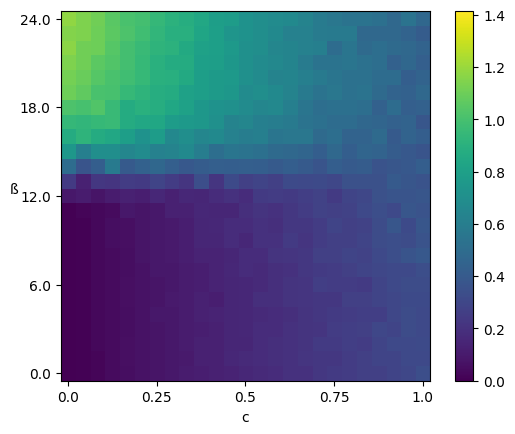

In [21]:
f = plot_heatmap_two_var(result, 'c', 'ß', 'g', 1, 'Esteban')

In [22]:
# saves the graphic as a pdf file for later use.
from pathlib import Path
fn = Path(f"~/Desktop/example_SPA_g_1_Esteban.pdf").expanduser()
f.savefig(fn, bbox_inches='tight', pad_inches=0)

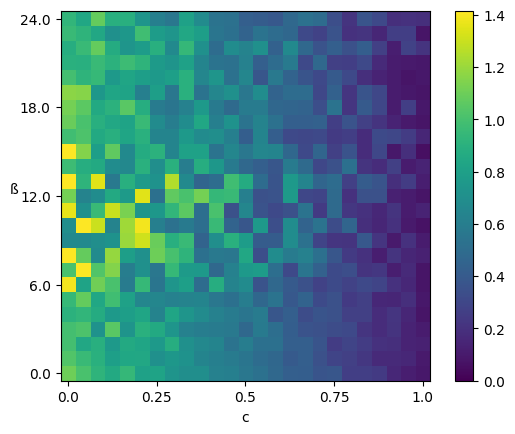

In [7]:
f = plot_heatmap_two_var(results_with_ER_BI, 'c', 'ß', 'g', 0.5, 'BI')

In [32]:
# saves the graphic as a pdf file for later use.
from pathlib import Path
fn = Path(f"~/Desktop/example_SPA_g_1_Bias.pdf").expanduser()
f.savefig(fn, bbox_inches='tight', pad_inches=0)